In [1]:
import pandas as pd
import numpy as np
from functools import reduce

Creating a Gradient Descent Algo from scratch

In [4]:
class GradientDescent():
    def __init__(self):
        self.w = 0 #slope or weight 
        self.b = 0 #intercept or bias
        self.y_predicted = []
        self.cost_history = []

    def calc_gradient(self,x,y,v):
        res = 2*(v[0]*x + v[1] - y)
        return (res*x).mean() , res.mean() #djdw,djdb

    def fit(self,x,y,learn_rate=0.1,n_iter=100):

        for i in range(n_iter):
            vector = [self.w,self.b]
            grad = self.calc_gradient(x,y,vector)
            self.w = self.w - learn_rate*grad[0]
            self.b = self.b - learn_rate*grad[1]

            self.cost_history.append(self.cost(x,y,vector))

            if self.b==0 and self.w==0:
                break
    
    def cost(self,x,y,v):
        m = x.shape[0]
        cost_array = (v[0]*x + v[1] - y)**2
        cost = reduce(lambda a,b:a+b,cost_array)
        total_cost = 1/(2*m) * cost
        return total_cost

    def predict(self,x_test):
        w,b = self.w,self.b
        for i in x_test:
            self.y_predicted.append(w*i+b)

        return self.y_predicted

    def mse(self,y_valid):
        mse = reduce(lambda x,y: x+y,(y_valid-self.y_predicted)**2)
        return mse/y_valid.shape[0]

Testing

In [5]:
x = np.array([1,2,3,4])
y = np.array([10,20,30,40])
x_valid = np.array([5,6,7])
y_valid = np.array([50,60,70])

In [6]:
model = GradientDescent()
model.fit(x,y)

Cost history

In [10]:
print(model.cost_history)

[375.0, 168.75, 76.125, 34.51687500000001, 15.815643750000003, 7.400365125000002, 3.6043980393750017, 1.8834590094187498, 1.095149851456123, 0.7264968620445907, 0.5471298260017712, 0.4535655339286196, 0.39929374067503454, 0.36338686145345506, 0.33640613198510194, 0.31407357449520557, 0.2944306777846299, 0.27656255689641207, 0.26002499272200613, 0.2445870595948549, 0.23011545341180034, 0.21652244756357714, 0.20374242304688617, 0.19172123393955998, 0.18041134143867965, 0.16976954326029992, 0.1597558733739753, 0.1503330319623481, 0.1414660579271601, 0.13312211451466044, 0.12527032970115304, 0.11788166490215768, 0.11092879991526239, 0.10438602846105319, 0.0982291615966661, 0.09243543759457033, 0.08698343748186166, 0.08185300571608131, 0.07702517560926671, 0.0724820991818367, 0.06820698116783765, 0.06418401691896773, 0.06039833397395407, 0.05683593707553248, 0.053483656430994356, 0.05032909902467014, 0.04736060280219582, 0.04456719355712922, 0.04193854436048175, 0.03946493738318268, 0.03713

In [8]:
predictions = model.predict(x_valid)
print(predictions)

[49.89779472561619, 59.8481775775431, 69.79856042947]


Mean squared error

In [9]:
error = model.mse(y_valid)
error

0.024691288882621037

Cost function graph w.r.t no.of Iterations

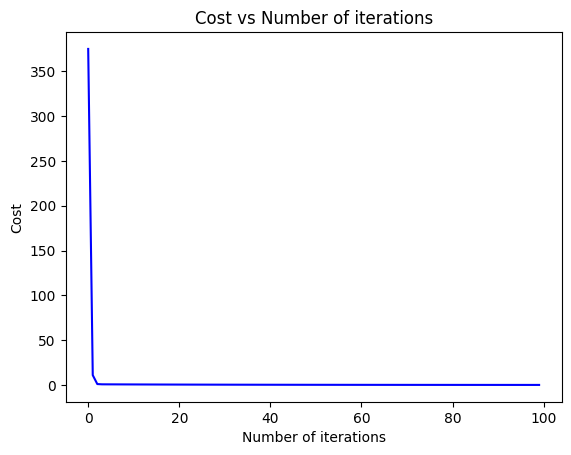

In [6]:
import matplotlib.pyplot as plt
nb = np.arange(100)
j = model.cost_history
plt.plot(nb,j,color='b')
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title("Cost vs Number of iterations")
plt.show()